<h1><center>Swish Analytics </center></h1>
<h1><center>Author: Rick Alarcon</center></h1>
<h1><center>Data Analysis for All pitches from the 2011 Season</center></h1>


In this project, I will analyze the dataset using data frames, plots, descriptive statistics, etc.
Before building prediction models, it is very important to pre-process and prepare the dataset before building the model so our machine learning model will be fed with more relevant and consistent data.
Also, if we are trying to create a forecasting model, we can use a linear regression model, while if we try to create an ML model to predict certain behavior of players or customers(classification), we can use a logistic regression approach.
Let's start!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

## Loading and exploring data##

In [2]:

#Use panda to load the csv file as panda.dataframe
dataset = pd.read_csv('pitches.csv',dtype={"game_pk": int,"at_bat_num":int,"event3":object,"event4":object})
#dataset.head()

In [29]:
#Dataset numbers of columns and rows
dataset.shape

(718961, 125)

In [30]:
#Counting the total of pitches for each different game
df1=dataset[['game_pk','uid']].groupby('game_pk').count()
df1.columns = ['Pitches']
df1.head()

,Pitches
game_pk,
286874,343
286875,266
286876,294
286877,302
286878,335


## Applying Descriptive Statistics and Graphs ##

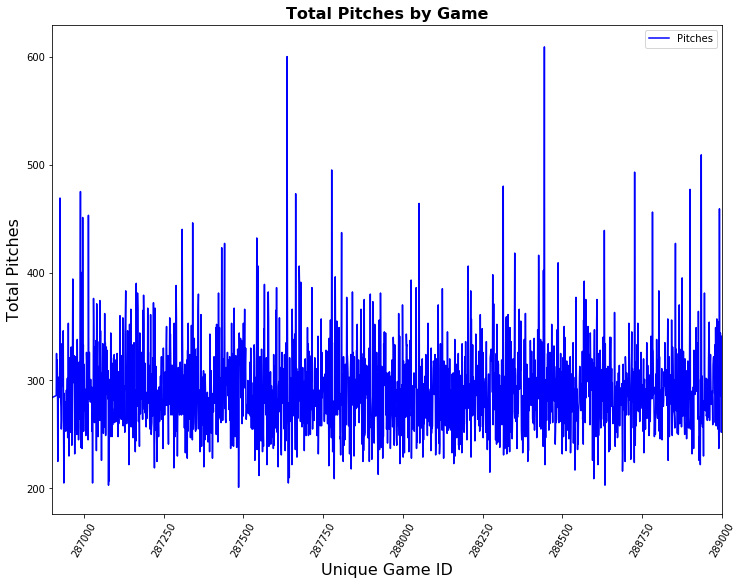

In [31]:
%matplotlib inline
#Plot Total Pitches vs Unique Games
df1.plot(rot=60, figsize=(12,9),color='blue')
#bitcoin_new=df_bitcoin365days #for later
plt.title("Total Pitches by Game",fontweight='bold',size=16)
plt.xlim(286900, 289000)
plt.ylabel("Total Pitches",size=16 )
plt.xlabel("Unique Game ID",size=16 )
plt.show()

In [32]:
dataset.head()

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [33]:
#Total numbers of inning and tops by game
dataset[['game_pk','inning','top']].groupby('game_pk').sum().head()

,inning,top
game_pk,,
286874,1819,158
286875,1267,115
286876,1324,145
286877,1475,145
286878,2013,171


In [34]:
#Descriptive Statistics for Inning and Tops
df2=dataset[['game_pk','inning','top']].groupby('game_pk').sum().head()
df2.describe()

,inning,top
count,5.000000,5.00000
mean,1579.600000,146.80000
std,323.704804,20.78942
min,1267.000000,115.00000
25%,1324.000000,145.00000
50%,1475.000000,145.00000
75%,1819.000000,158.00000
max,2013.000000,171.00000


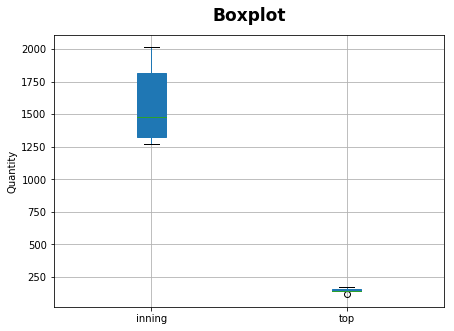

In [35]:
df2.boxplot(figsize=(7,5),patch_artist=True)
plt.ylabel('Quantity')
#Make the figue prettier
plt.title('Boxplot', y=1.03, fontsize=17, weight='bold')
plt.show()

### Analysing the balls, strikes, fouls and outs for the 2011 Season

In [36]:
#Totals for each different baseball game in the 2011 season
dataset[['game_pk','balls','strikes','fouls','outs']].groupby('game_pk').sum().head()

,balls,strikes,fouls,outs
game_pk,,,,
286874,321,332,172,374
286875,263,233,90,274
286876,293,255,90,267
286877,249,259,107,308
286878,312,275,153,333


In [37]:
#Statistics for the balls, strikes, fould and outs 
dataset[['game_pk','balls','strikes','fouls','outs']].groupby('game_pk').sum().describe()

,balls,strikes,fouls,outs
count,2467.000000,2467.000000,2467.00000,2467.000000
mean,256.889745,249.822862,117.50831,284.198216
std,50.034692,41.045588,31.79387,46.722629
min,108.000000,125.000000,37.00000,172.000000
25%,223.000000,223.000000,95.00000,252.000000
50%,254.000000,246.000000,114.00000,279.000000
75%,286.000000,272.000000,137.00000,311.000000
max,546.000000,535.000000,324.00000,590.000000


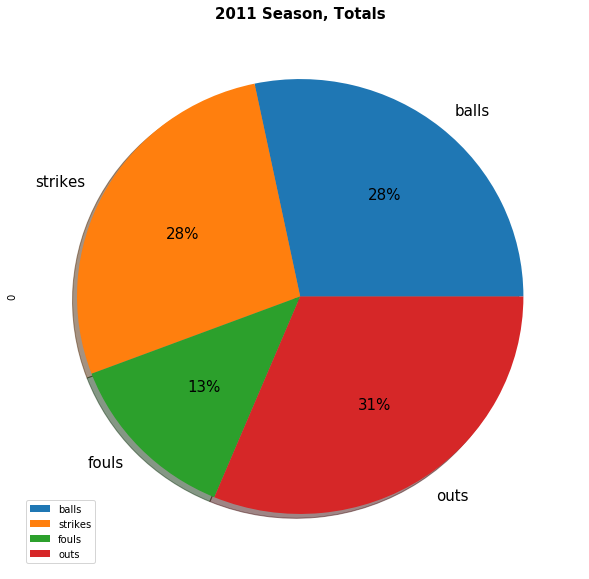

In [38]:
#Pie chart with the percentage distributtion
df3=dataset[['balls','strikes','fouls','outs']].sum()
df3=pd.DataFrame(df3)
df3.plot.pie(subplots='TRUE',figsize=(10,10),shadow=True,autopct='%0.f%%', fontsize=15 )
plt.title('2011 Season, Totals',weight='bold',fontsize=15)
plt.show()

### Batter vs Pitchers Distribution and Number of Games Played

In [39]:
#GETTING THE PLAYERS ID FOR THE 2011 SEASON
df4=dataset[['batter_id','pitcher_id']]
df4.shape

(718961, 2)

In [40]:
df4.head()

,batter_id,pitcher_id
0,430895,460024
1,430895,460024
2,430895,460024
3,430895,460024
4,435062,460024


In [41]:
#Total number of games each batter played on the 2011 baseball season
df4.groupby('batter_id').size().reset_index(name='Count').rename(columns={'Count':'Games'}).head()

,batter_id,Games
0,110029,2549
1,110683,26
2,111072,413
3,111851,1554
4,111867,1015


In [42]:
# TOP BATTER PLAYERS WHO PLAYED THE MOST ON THE 2011 SEASON
df5=df4.groupby('batter_id').size().reset_index(name='Count').rename(columns={'Count':'Games'})
df5.sort_values(['Games'], ascending=[False]).head()


,batter_id,Games
332,434158,3186
365,435079,3177
563,456030,3077
188,407893,2907
611,458015,2888


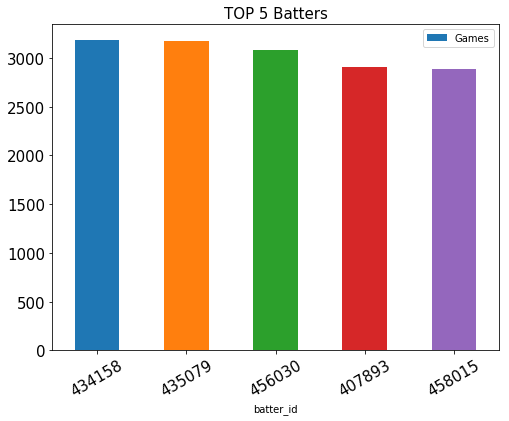

In [43]:
#TOP 5 BATTERS PLAYERS
top5batters=df5.sort_values(['Games'], ascending=[False]).head()
top5batters.plot.bar(y='Games',x='batter_id', figsize=(8,6), fontsize=15, rot=30)
plt.title('TOP 5 Batters', fontsize=15)
plt.show()

In [44]:
#TOTAL NUMBER OF GAMES PLAYED BY EACH PITCHER ON THE 2011 BASECALL SEASON
df4.groupby('pitcher_id').size().reset_index(name='Count').rename(columns={'Count':'Games'}).head()

,pitcher_id,Games
0,110683,981
1,112020,4155
2,112526,2542
3,115629,810
4,115817,2688


In [45]:
#TOP PITCHERS WHO PLAYED THE MOST IN THE 2011 SEASON
df6=df4.groupby('pitcher_id').size().reset_index(name='Count').rename(columns={'Count':'Games'})
df6.sort_values(['Games'], ascending=[False]).head()

,pitcher_id,Games
179,434378,4301
1,112020,4155
289,450351,4118
352,456034,3798
301,451596,3775


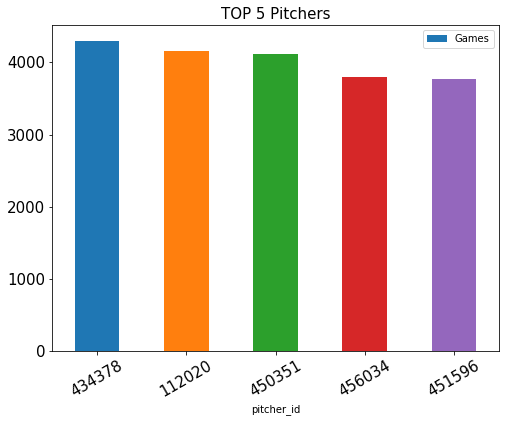

In [46]:
#TOP 5 PITCHERS PLAYERS
top5pitchers=df6.sort_values(['Games'], ascending=[False]).head()
top5pitchers.plot.bar(y='Games',x='pitcher_id', figsize=(8,6), fontsize=15, rot=30)
plt.title('TOP 5 Pitchers', fontsize=15)
plt.show()

## Recap of machine learning concepts: ##
An intance: is the whole data we are analysing

the label: is the column we are trying to predict

the features: are all the others columns different than the label column

(I used Bigquery before which uses feature enginerring to explore, clean and
preprocess the data, before input it in the ML model).

Note:
Features must be:

-related to the objetive

-numeric with meaningful magnitude

-have good quantity of examples to test

-help us to bring insights to the problems

## Steps to build a Machine Learning Model: ##
1)Identify your goals

2)Establich benchmark(it is the tolerance of error for our model prediction)

3)Onces you have your Clean Dataset

4)Split that data into Training and validations datasets

5)Check the loss metrics(in linear regression we uses MSE or RMSE)

(this is a way to measure success too because we are trying to minimim errors)

6)If you need to retrain it, split it into: train, validation and test datasets

Note:

Feature Engineering is often the hardest part of the Machine learning models

(but this lead us to better prediction models and analysis)

-we can Preprocess features by: exploring, Joining tables, creating new train/test tables


### Knowing all the steps already mentioned above : ###
    
We can try to predict the probability the X pitcher will do a strike, etc. we can analyze historical data

for example of how was the performance for that pitcher in different games and create a model using the 

above steps to help us predict the probability that the pitcher will do y performance in X real-time environment

<img src="https://upload.wikimedia.org/wikipedia/fr/d/df/Ligue_majeure_de_Baseball.png" width="500">
